<a href="https://colab.research.google.com/github/gaelpm07/Final_Project_Team4/blob/main/PIA_EQUIPO_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Equipo 4
**Integrantes:** Gael Orlando Ponce Moreno 1945525, Marcelo Fabrissio Martínez Parga-1793911, Jesus Carlos Gonzalez Rodriguez 1970842, Javier Antonio Flores Ibarra 2077559 (JUEVES-N4-N6)

# Brain Images for Brain Tumor Detection

In [45]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2
from sklearn.model_selection import train_test_split
from tensorflow.keras import datasets, layers, models
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import glob
from PIL import Image
from skimage.color import rgb2gray
from tensorflow import keras

In [21]:
!kaggle datasets download -d navoneel/brain-mri-images-for-brain-tumor-detection

 99% 15.0M/15.1M [00:00<00:00, 77.6MB/s]
100% 15.1M/15.1M [00:00<00:00, 76.6MB/s]


In [22]:
!unzip brain-mri-images-for-brain-tumor-detection.zip

Archive:  brain-mri-images-for-brain-tumor-detection.zip
  inflating: brain_tumor_dataset/no/1 no.jpeg  
  inflating: brain_tumor_dataset/no/10 no.jpg  
  inflating: brain_tumor_dataset/no/11 no.jpg  
  inflating: brain_tumor_dataset/no/12 no.jpg  
  inflating: brain_tumor_dataset/no/13 no.jpg  
  inflating: brain_tumor_dataset/no/14 no.jpg  
  inflating: brain_tumor_dataset/no/15 no.jpg  
  inflating: brain_tumor_dataset/no/17 no.jpg  
  inflating: brain_tumor_dataset/no/18 no.jpg  
  inflating: brain_tumor_dataset/no/19 no.jpg  
  inflating: brain_tumor_dataset/no/2 no.jpeg  
  inflating: brain_tumor_dataset/no/20 no.jpg  
  inflating: brain_tumor_dataset/no/21 no.jpg  
  inflating: brain_tumor_dataset/no/22 no.jpg  
  inflating: brain_tumor_dataset/no/23 no.jpg  
  inflating: brain_tumor_dataset/no/24 no.jpg  
  inflating: brain_tumor_dataset/no/25 no.jpg  
  inflating: brain_tumor_dataset/no/26 no.jpg  
  inflating: brain_tumor_dataset/no/27 no.jpg  
  inflating: brain_tumor_datase

Pre-procesamiento de imagenes, carga y revision de la misma

In [44]:
folder_path_yes = '/content/brain_tumor_dataset/yes'
folder_path_no = '/content/brain_tumor_dataset/no'

In [24]:
image_files_yes = glob.glob(folder_path_yes + '/*.jpg')
image_files_no = glob.glob(folder_path_no + '/*.jpg')

In [25]:
images_yes = []
labels_yes = []
images_no = []
labels_no = []
class_names = ['yes', 'no']

In [26]:
for image_file in image_files_yes:
    image = Image.open(image_file)
    images_yes.append(image)
    labels_yes.append("yes")

for image_file in image_files_no:
    image = Image.open(image_file)
    images_no.append(image)
    labels_no.append("no")

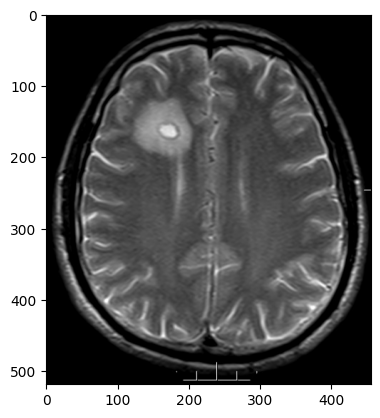

In [27]:
if images_yes:
    plt.imshow(images_yes[0])
    plt.show()
else:
    print("La lista images_yes está vacía.")


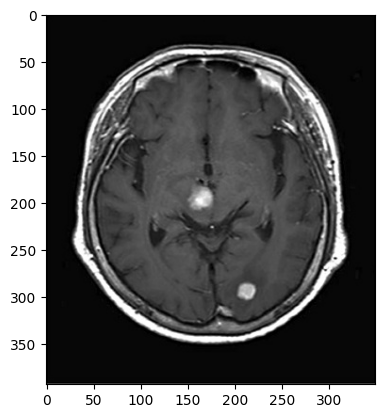

In [59]:
if images_no:
  plt.imshow(images_no[0])
  plt.show()
else:
    print("La lista images_yes está vacía.")

Revisión del contenido general

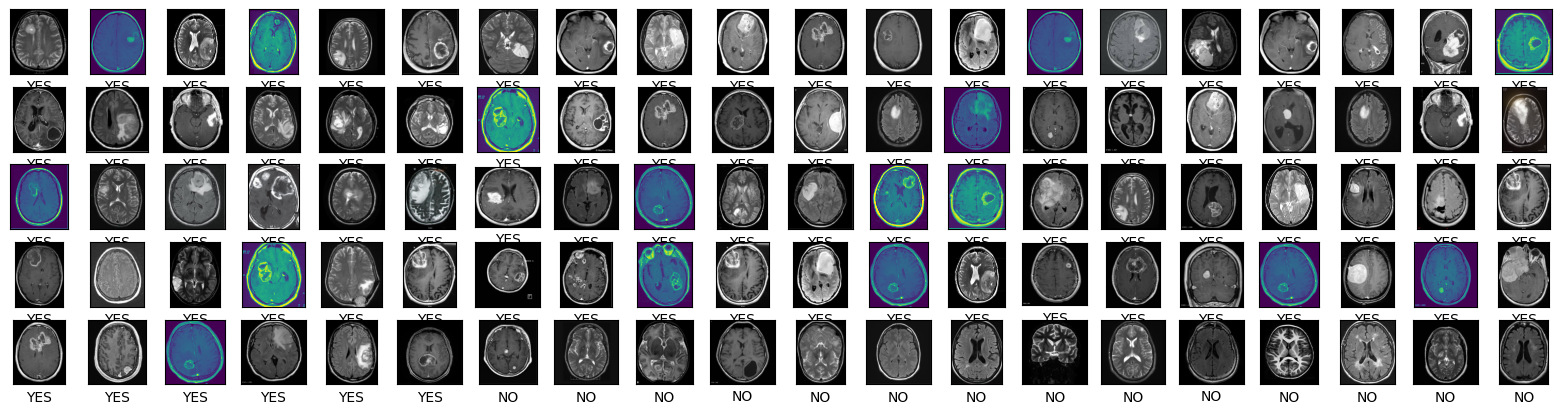

In [63]:
class_names = ['YES', 'NO']

plt.figure(figsize=(20, 20))
for i in range(100):
    plt.subplot(20, 20, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)

    # Mostrar imagen de la lista images_yes con etiqueta "Yes" o con etiqueta "No"
    if i < len(images_yes):
        plt.imshow(images_yes[i])
        plt.xlabel(class_names[0])

    else:
        img_index = i - len(images_yes)
        plt.imshow(images_no[img_index])
        plt.xlabel(class_names[1])

plt.show()

Encontrar la minima resolucion en ambas carpetas, para su posterior reezise y normalización

In [47]:
min_width_yes = min(image.width for image in images_yes)
min_height_yes = min(image.height for image in images_yes)
print("Size of the smallest image in the folder 'images_yes': {} x {}".format(min_width_yes, min_height_yes))

min_width_no = min(image.width for image in images_no)
min_height_no = min(image.height for image in images_no)
print("Size of the smallest image in the folder 'images_no': {} x {}".format(min_width_no, min_height_no))


Size of the smallest image in the folder 'images_yes': 180 x 210
Size of the smallest image in the folder 'images_no': 150 x 168


**Modelo ML**

Epoch 1/10
4/4 [==============================] - 6s 1s/step - loss: 0.7632 - accuracy: 0.5221 - val_loss: 0.5554 - val_accuracy: 0.7692
Epoch 2/10
4/4 [==============================] - 4s 1s/step - loss: 0.6036 - accuracy: 0.6549 - val_loss: 0.4200 - val_accuracy: 0.8077
Epoch 3/10
4/4 [==============================] - 6s 2s/step - loss: 0.5138 - accuracy: 0.7168 - val_loss: 0.3799 - val_accuracy: 0.8077
Epoch 4/10
4/4 [==============================] - 6s 1s/step - loss: 0.4087 - accuracy: 0.7522 - val_loss: 0.3182 - val_accuracy: 0.8462
Epoch 5/10
4/4 [==============================] - 4s 1s/step - loss: 0.3220 - accuracy: 0.8584 - val_loss: 0.2899 - val_accuracy: 0.8846
Epoch 6/10
4/4 [==============================] - 4s 1s/step - loss: 0.2488 - accuracy: 0.8673 - val_loss: 0.2687 - val_accuracy: 0.9231
Epoch 7/10
4/4 [==============================] - 7s 2s/step - loss: 0.1890 - accuracy: 0.8938 - val_loss: 0.3856 - val_accuracy: 0.7308
Epoch 8/10
4/4 [=========================

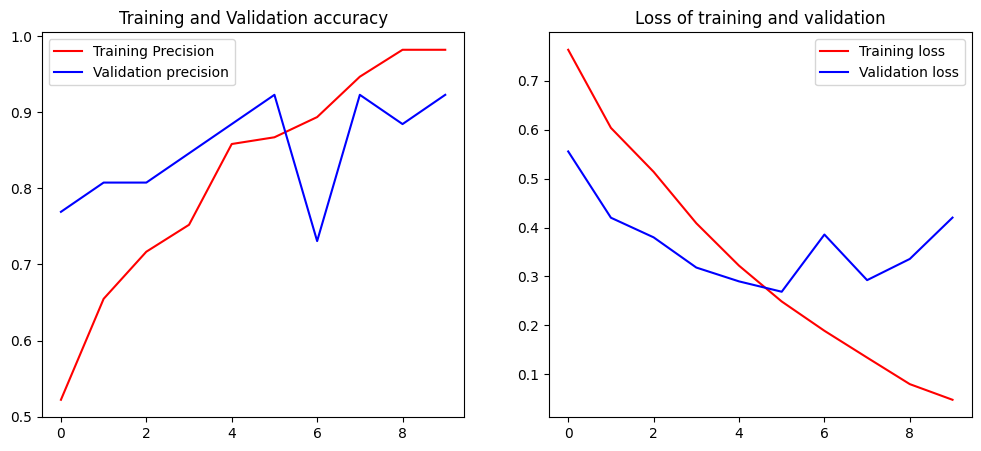

In [73]:
# Crear una lista combinada de imágenes y etiquetas
images = [np.array(image) for image in images_yes + images_no]
labels = np.concatenate((np.ones(len(images_yes)), np.zeros(len(images_no))))

train_images, test_images, train_labels, test_labels = train_test_split(images, labels, test_size=0.2, random_state=42)

new_width = 150
new_height = 150

def resize_and_filter(images, labels, width, height):
    """
    Redimensiona las imágenes a un tamaño específico y filtra aquellas que no son RGB.
    """
    resized_images = []
    filtered_labels = []
    for image, label in zip(images, labels):
        resized_image = cv2.resize(image, (width, height))
        if resized_image.shape == (height, width, 3):
            resized_images.append(resized_image)
            filtered_labels.append(label)
    return resized_images, filtered_labels

# Aplicar la función a los conjuntos de entrenamiento y prueba
train_images_rgb, train_labels_filtered = resize_and_filter(train_images, train_labels, new_width, new_height)
test_images_rgb, test_labels_filtered = resize_and_filter(test_images, test_labels, new_width, new_height)

train_images_rgb = np.array(train_images_rgb) / 255.0
test_images_rgb = np.array(test_images_rgb) / 255.0
train_labels_filtered = np.array(train_labels_filtered)
test_labels_filtered = np.array(test_labels_filtered)

# Construir el modelo de la CNN
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(new_height, new_width, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])

# Compilar el modelo
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Ajustar el modelo a los datos de entrenamiento
history = model.fit(train_images_rgb, train_labels_filtered, epochs=10, validation_data=(test_images_rgb, test_labels_filtered))

# Evaluar el modelo en los datos de prueba
test_loss, test_acc = model.evaluate(test_images_rgb, test_labels_filtered, verbose=2)
print('Accuracy en los datos de prueba:', test_acc)

# Graficar la precisión y la pérdida durante el entrenamiento
epochs = range(len(history.history['accuracy']))
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(epochs, history.history['accuracy'], 'r', label='Training Precision')
plt.plot(epochs, history.history['val_accuracy'], 'b', label='Validation precision')
plt.title('Training and Validation accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(epochs, history.history['loss'], 'r', label='Training loss')
plt.plot(epochs, history.history['val_loss'], 'b', label='Validation loss')
plt.title('Loss of training and validation')
plt.legend()

plt.show()


Revisamos la predicción general y observamos su tipo

In [32]:
predictions=model.predict(test_images_normalized)

1/1 [==============================] - 0s 451ms/step


In [33]:
predictions[0]

array([0.5529355], dtype=float32)

Hacemos una revisión del modelo

In [49]:

# Guardar el modelo
model.save('modelo.h5')

loaded_model = tf.keras.models.load_model('modelo.h5')

predictions = loaded_model.predict(test_images_normalized)

predicted_labels = np.round(predictions).flatten()

print('Predicted tags:', predicted_labels)
print('real labels:', test_labels_filtered)


1/1 [==============================] - 1s 560ms/step
Predicted tags: [1. 0. 1. 0. 1. 0. 1. 0. 0. 1. 1. 0. 0. 0. 0. 1. 1. 0. 0. 1. 0. 0. 1. 1.
 1. 1.]
real labels: [0. 1. 1. 0. 0. 0. 0. 0. 1. 1. 1. 1. 1. 0. 1. 1. 1. 0. 1. 1. 0. 1. 0. 1.
 0. 0.]


Verificamos visualmente el resultado final.

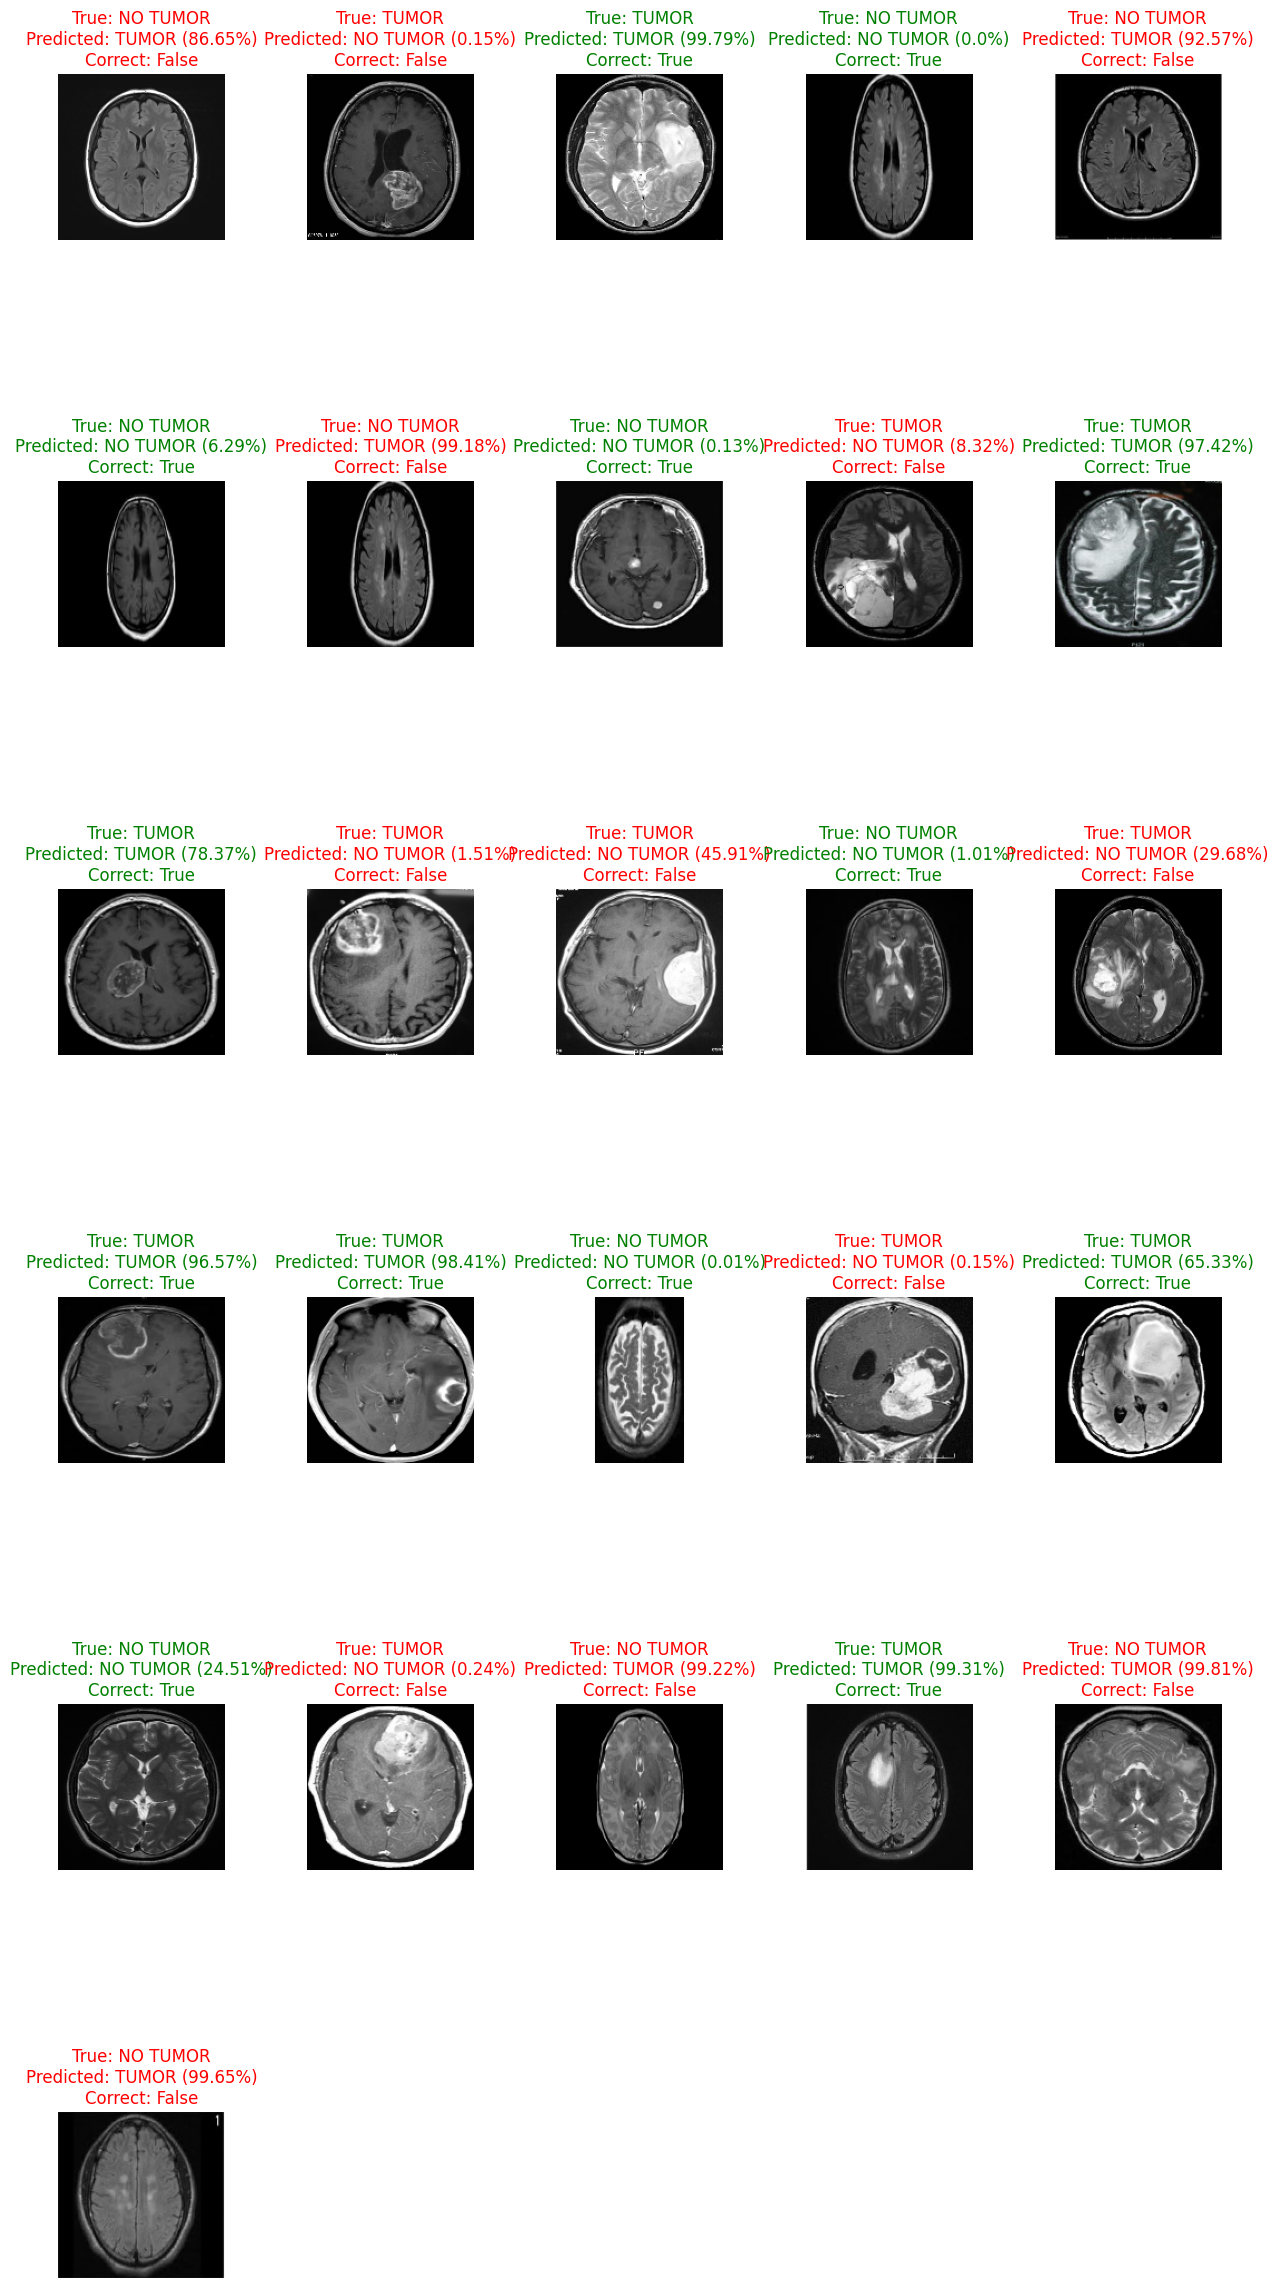

In [69]:
def show_labels(labels, predicted_labels, predictions, images, ncols=5):
    """
    Muestra las imágenes con las etiquetas verdaderas y predichas, incluyendo el porcentaje de confianza.
    """
    class_names = ['NO TUMOR', 'TUMOR']
    num_images = len(labels)
    nrows = -(-num_images // ncols)  # Redondeo hacia arriba
    figsize = (15, 5 * nrows)

    fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=figsize)
    fig.subplots_adjust(hspace=0.5, wspace=0.5)

    for idx, ax in enumerate(axes.flat):
        if idx < num_images:
            true_label = labels[idx]
            predicted_label = predicted_labels[idx]
            confidence = round(predictions[idx][0] * 100, 2)
            correct = true_label == predicted_label

            ax.imshow(images[idx])
            ax.set_title(f'True: {class_names[int(true_label)]}\nPredicted: {class_names[int(predicted_label)]} ({confidence}%)\nCorrect: {correct}', color='green' if correct else 'red')
            ax.axis('off')
        else:
            ax.set_visible(False)

    plt.show()

show_labels(test_labels_filtered, predicted_labels, predictions, test_images_rgb)
